<a href="https://colab.research.google.com/github/Soumi88-dev/Team4_Python_Warriors/blob/main/Team4_Python_Warriers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions 33-48 Team4_Python_Warriers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read the excel file and store the sheets into dataframes.
dataset = pd.ExcelFile('/content/drive/MyDrive/Google Colab Practice Folder/Python_hackathon_Aug2024/V02Max_Combined.xlsx')

Athletes = pd.read_excel(dataset, sheet_name = 'Athletes')
Kayaking = pd.read_excel(dataset, sheet_name = 'Kayaking')
Triathlon = pd.read_excel(dataset, sheet_name = 'Triathlon')
Fencing = pd.read_excel(dataset, sheet_name = 'Fencing')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
Athletes.head()

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez
1,2,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds
2,3,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper
3,4,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez
4,5,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson


### Qs1: Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [4]:
# Add a new column to indicate the sport category
#Kayaking['sport'] = 'Kayaking'
#Triathlon['sport'] = 'Triathlon'
#Fencing['sport'] = 'Fencing'

# Concatenate the DataFrames
#All_sports=pd.concat([Kayaking, Triathlon, Fencing])
#All_sports.head(40)
# Set 'sport' as the index
#All_sports.set_index(['sport'], inplace=True)
#All_sports.head()

#All_sports.to_excel('/content/drive/MyDrive/Google Colab Practice Folder/Python_hackathon_Aug2024/All_sports.xlsx')

In [4]:
# Concatenate the DataFrames
All_sports=pd.concat([Kayaking, Triathlon, Fencing])

All_sports.head()
# write the dataframe in excel
All_sports.to_excel('/content/drive/MyDrive/Google Colab Practice Folder/Python_hackathon_Aug2024/All_sports.xlsx')

# Qs2: Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [39]:
#Fencing
for index, row in Fencing.iterrows():
    if row['time'] < 0:
        Fencing.at[index, 'Type'] = 'Warm-up'

    elif row['time'] >= 0 and row['power'] > 0:
        Fencing.at[index, 'Type'] = 'GET'

    else:
        Fencing.at[index, 'Type'] = 'Cool-down'
#Kayaking

for index, row in Kayaking.iterrows():
    if row['time'] < 0:
        Kayaking.at[index, 'Type'] = 'Warm-up'

    elif row['time'] >= 0 and row['power'] > 0:
        Kayaking.at[index, 'Type'] = 'GET'

    else:
        Kayaking.at[index, 'Type'] = 'Cool-down'
#Triathlon
for index, row in Triathlon.iterrows():
    if row['time'] < 0:
        Triathlon.at[index, 'Type'] = 'Warm-up'

    elif row['time'] >= 0 and row['power'] > 0:
        Triathlon.at[index, 'Type'] = 'GET'

    else:
        Triathlon.at[index, 'Type'] = 'Cool-down'

All_sports=pd.concat([Kayaking, Triathlon, Fencing])

#Print All_sports
#print(All_sports.tail())
All_sports.to_excel('/content/drive/MyDrive/Google Colab Practice Folder/Python_hackathon_Aug2024/All_sports_withType.xlsx')


In [6]:
conditions=[
    (All_sports['time']<0),
    (All_sports['time']>=0) & (All_sports['power']>0),
    (All_sports['power']<=0)
]
choices=['Warm up','GET','Cool down']
All_sports['stage']=np.select(conditions,choices,default='cool down')

All_sports.to_excel('/content/drive/MyDrive/Google Colab Practice Folder/Python_hackathon_Aug2024/All_sports_withType.xlsx')
#print(All_sports.loc[All_sports['ID']==11])

      ID      time     RR       VO2  power      stage
0     11  -168.600  727.0  0.287147      0    Warm up
1     11  -167.872  728.0  0.287147      0    Warm up
2     11  -167.148  724.0  0.287147      0    Warm up
3     11  -166.484  664.0  0.320580      0    Warm up
4     11  -165.836  648.0  0.320580      0    Warm up
...   ..       ...    ...       ...    ...        ...
3849  11  1501.928  536.0  0.598670      0  Cool down
3850  11  1502.464  536.0  0.598670      0  Cool down
3851  11  1503.000  536.0  0.598670      0  Cool down
3852  11  1503.524  524.0  0.598670      0  Cool down
3853  11  1504.056  532.0  0.598670      0  Cool down

[3854 rows x 6 columns]


In [7]:
merged_sports=pd.merge(All_sports,Athletes,on='ID',how='inner')
print(merged_sports)

       ID     time     RR       VO2  power      stage  age  Weight  Height  \
0      11 -168.600  727.0  0.287147      0    Warm up   18    84.8     182   
1      11 -167.872  728.0  0.287147      0    Warm up   18    84.8     182   
2      11 -167.148  724.0  0.287147      0    Warm up   18    84.8     182   
3      11 -166.484  664.0  0.320580      0    Warm up   18    84.8     182   
4      11 -165.836  648.0  0.320580      0    Warm up   18    84.8     182   
...    ..      ...    ...       ...    ...        ...  ...     ...     ...   
52057  10  942.700  428.0  0.786363      0  Cool down   14    58.8     177   
52058  10  943.124  424.0  0.786363      0  Cool down   14    58.8     177   
52059  10  943.552  428.0  0.786363      0  Cool down   14    58.8     177   
52060  10  943.976  424.0  0.786363      0  Cool down   14    58.8     177   
52061  10  944.404  428.0  0.786363      0  Cool down   14    58.8     177   

       P_vt1  P_vt2    sport  Gender Ethnicity First Name Last 

# ** Qs33.Create a list and a tuple. Print the types and lengths of  both.**

In [27]:
list=['My','2nd','Python','Hackathon']
print("The type of this:", type(list) ,"and length of the list is:", len(list))

tuple=('Python','Hackathon','is','in','progress')
print("Type of the Tuple is: ",type(tuple),"and length of the tuple is: ", len(tuple))

The type of this: <class 'list'> and length of the list is: 4
Type of the Tuple is:  <class 'tuple'> and length of the tuple is:  5


## Qs34 Display a word cloud using any values in the dataset

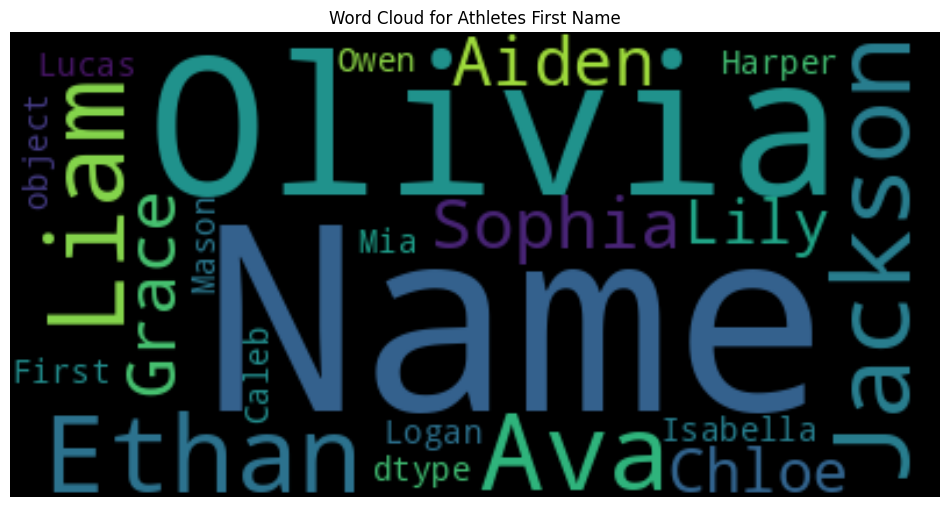

In [44]:
# importing all necessary modules
#from wordcloud import WordCloud
import wordcloud as wc
import matplotlib.pyplot as plt

# iterate through the Athletes data frame
for Name in Athletes.iterrows():

  # typecaste each First Name to string
  first_names = str(Athletes['First Name'])

wordcloud = wc.WordCloud(width=400, height=200, background_color='black').generate(first_names)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Athletes First Name')
plt.axis('off')
plt.show()


## Qs35 Create a Regression Plot on Max V02 and mean BMI for any sport of your choice

   ID          VO2  sport  Weight  Height  max_vo2    BMI
0  11  7596.969334  kayak    84.8     182    89.59  25.60
1  12  7934.206192  kayak    86.0     183    92.26  25.68
2  13  7614.654355  kayak    83.9     183    90.76  25.05
3  14  3418.394901  kayak    62.3     171    54.87  21.31
4  15  4250.440182  kayak    63.5     172    66.94  21.46
5  16  4904.178169  kayak    70.4     182    69.66  21.25


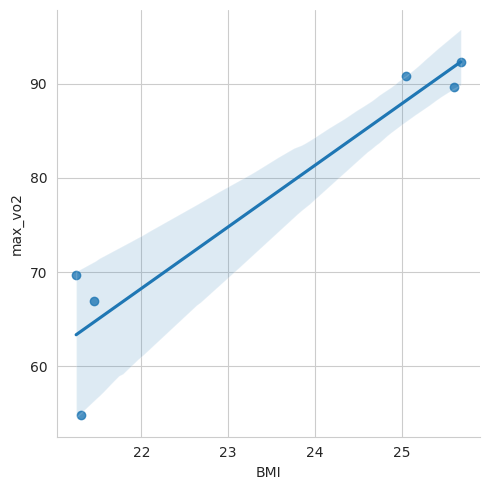

In [28]:
#Kayaking.groupby('ID')['VO2'].sum()

sum_vo2=Kayaking.groupby(['sport','ID'])['VO2'].sum()


df1=pd.merge(sum_vo2,Athletes,on='ID',how='inner')[['ID','VO2','sport','Weight','Height']]


for index, row in df1.iterrows():

        df1.at[index, 'max_vo2'] = round(df1.at[index, 'VO2']/df1.at[index, 'Weight'],2)
        df1.at[index, 'BMI'] = round(df1.at[index, 'Weight']/((df1.at[index, 'Height']/100)**2),2)
print(df1)

sns.set_style('whitegrid')
sns.lmplot(x ='BMI', y ='max_vo2', data = df1)

#QS70 On Average how long did most athletes spend at 75% of MaxHR (Max HR is calculated as 220-Age)

In [26]:
Athletes['Max_HR']=220-Athletes['age']
Athletes['75%Max_HR']=round(Athletes['Max_HR']*0.75,0)
#print(Athletes)
All_sports['HR']=round(60000/All_sports['RR'],0)

df1=pd.merge(All_sports,Athletes,on='ID',how='inner')[['ID','75%Max_HR','time','HR']]
#print(df1)
df2=df1.loc[df1['75%Max_HR']==df1['HR']].reset_index()
df3=df2.groupby('ID')['time'].max()-df2.groupby('ID')['time'].min()
df3.mean()

515.1886666666667

In [29]:
hr_cal= 60000/hr_cal['RR']
print(hr_cal)

sport
Kayaking     82.530949
Kayaking     82.417582
Kayaking     82.872928
Kayaking     90.361446
Kayaking     92.592593
               ...    
Fencing     140.186916
Fencing     141.509434
Fencing     140.186916
Fencing     141.509434
Fencing     140.186916
Name: RR, Length: 52062, dtype: float64


## Qs36 Plot the time series of HR( every 5 mins) of athlete 1

<ipython-input-45-b32a8bc44552>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ath1['HR']=round(60000/df_ath1['RR'],2)
<ipython-input-45-b32a8bc44552>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ath1['time'] = pd.to_timedelta(df_ath1['time'],unit='s')


                          ID   RR       VO2  power    sport       Type      HR
time                                                                          
-1 days +23:57:49.160000   1  672  0.302008      0  Fencing    Warm-up   89.29
-1 days +23:57:49.832000   1  672  0.302008      0  Fencing    Warm-up   89.29
-1 days +23:57:50.464000   1  632  0.301336      0  Fencing    Warm-up   94.94
-1 days +23:57:51.176000   1  712  0.301336      0  Fencing    Warm-up   84.27
-1 days +23:57:52.052000   1  876  0.301336      0  Fencing    Warm-up   68.49
...                       ..  ...       ...    ...      ...        ...     ...
0 days 00:14:14.372000     1  484  0.318326      0  Fencing  Cool-down  123.97
0 days 00:14:14.848000     1  476  0.318326      0  Fencing  Cool-down  126.05
0 days 00:14:15.332000     1  484  0.318326      0  Fencing  Cool-down  123.97
0 days 00:14:15.824000     1  492  0.318326      0  Fencing  Cool-down  121.95
0 days 00:14:16.316000     1  492  0.318326      0  

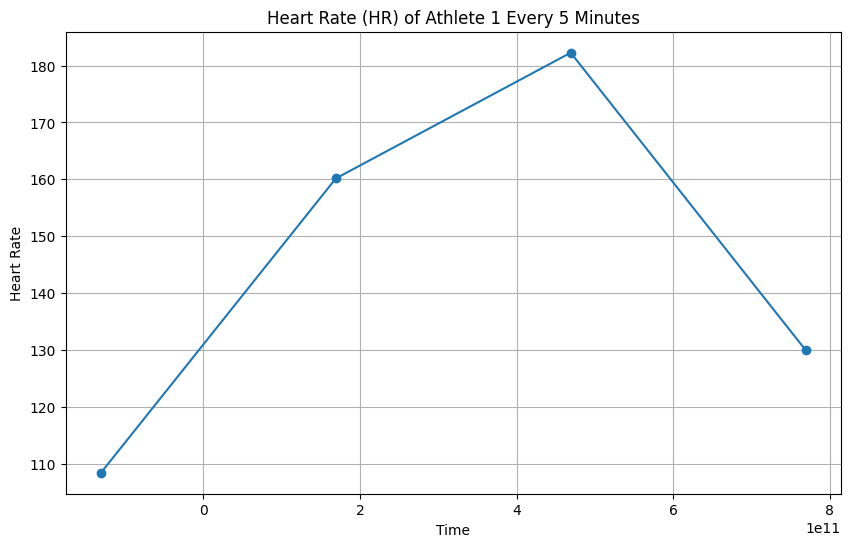

In [45]:
df_ath1=Fencing.loc[Fencing['ID']==1 ]
df_ath1['HR']=round(60000/df_ath1['RR'],2)
#print(df_ath1[['ID','time','HR']])
df_ath1['time'] = pd.to_timedelta(df_ath1['time'],unit='s')

df_ath1.set_index('time', inplace=True)

print(df_ath1)
# Resample the data to 5-minute intervals, calculating the mean HR in each interval
df_ath1_resampled = df_ath1['HR'].resample('5T').mean()



plt.figure(figsize=(10, 6))
plt.plot(df_ath1_resampled, marker='o', linestyle='-')
plt.title('Heart Rate (HR) of Athlete 1 Every 5 Minutes')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()


# Qs45 Create a dummy array with no data with a size of 15.

In [56]:
# Create a dummy array with a size of 15
dummy_array = np.empty(15)

print(dummy_array)

[2.53505e-320 4.91151e-320 6.47671e-320 6.84973e-320 7.19310e-320
 7.55031e-320 7.93618e-320 8.44309e-320 1.09030e-319 1.34129e-319
 1.57227e-319 1.62128e-319 1.62128e-319 1.62128e-319 1.62128e-319]


### Qs48 What was the average age of the athletes?

In [51]:
print("The average age of the Athletes is: ",  round(Athletes['age'].mean(),2))

The average age of the Athletes is:  15.22


# Qs67: Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?

In [17]:
sum_vo2=All_sports.groupby(['sport','ID'])['VO2'].sum()


df1=pd.merge(sum_vo2,Athletes,on='ID',how='inner')[['ID','VO2','sport','Weight']]


for index, row in df1.iterrows():

        df1.at[index, 'max_vo2'] = round(df1.at[index, 'VO2']/df1.at[index, 'Weight'],2)

#print(df1)

df2=df1.groupby('sport')['max_vo2'].mean()

print(df2.idxmax(),"sport had the highest average cardiorespiratory fitness in terms of v02 max with value: ",df2.max())
print(df2.idxmax())

    ID          VO2      sport  Weight  max_vo2
0    1  2298.775092    fencing    53.7    42.81
1    2  2171.152256    fencing    56.2    38.63
2    3  6266.538536    fencing    89.9    69.71
3    4  5889.725663    fencing    76.5    76.99
4    5  6627.133058    fencing    76.4    86.74
5    6  4702.172897    fencing    65.6    71.68
6    7  1912.518617    fencing    49.8    38.40
7    8  2294.891090    fencing    51.2    44.82
8    9  2837.718226    fencing    57.1    49.70
9   10  3241.183654    fencing    58.8    55.12
10  11  7596.969334      kayak    84.8    89.59
11  12  7934.206192      kayak    86.0    92.26
12  13  7614.654355      kayak    83.9    90.76
13  14  3418.394901      kayak    62.3    54.87
14  15  4250.440182      kayak    63.5    66.94
15  16  4904.178169      kayak    70.4    69.66
16  17  2944.213260  triathlon    39.9    73.79
17  18  3223.988381  triathlon    39.7    81.21
triathlon sport had the highest average cardiorespiratory fitness in terms of v02 with v

# Qs37 What was the maximum power achieved in terms of watts, which participant achieved it? Display name, sport and watts.

In [54]:
result=All_sports.loc[All_sports['power']==All_sports['power'].max()]
print(result)
result1=pd.merge(result,Athletes,on='ID',how='inner')[['First Name','Last Name','sport','power']]
print("The maximum power achieved by:" ,result1.iloc[0].to_string(index=False))

          ID      time     RR       VO2  power
sport                                         
Kayaking  11  1266.508  324.0  2.807157    335
Kayaking  11  1266.832  324.0  2.807157    335
Kayaking  11  1267.160  328.0  2.807157    335
Kayaking  11  1267.480  320.0  2.849358    335
Kayaking  11  1267.808  328.0  2.849358    335
The maximum power achieved by: Isabella
 Griffin
   kayak
     335


## Qs38: What is the average  difference in IBI during the warm up Vs the actual test?

In [40]:
#Kayaking.head()

# Concatenate the DataFrames
All_sports_1=pd.concat([Kayaking, Triathlon, Fencing], ignore_index=True)
#All_sports.head(40)
# Set 'sport' as the index
All_sports_1.set_index(['sport'], inplace=True)
avg_IBI=All_sports_1.groupby('Type')['RR'].mean()
print(avg_IBI)
print("The average difference in IBI during the warm up Vs the actual test is :" ,round(avg_IBI['Warm-up']-avg_IBI['GET'],2))

Type
Cool-down    430.566582
GET          410.184310
Warm-up      767.806178
Name: RR, dtype: float64
The average difference in IBI during the warm up Vs the actual test is : 357.62


# Qs42 What was lowest wattage achieved at the end of a test and by which participant? Display name, sport and watts.

In [19]:
GET_test=merged_sports.loc[merged_sports['stage']=='GET']

end_of_test=GET_test.groupby('ID')['time'].max()
#print(end_of_test)
wattage=pd.merge(end_of_test,GET_test,on=['ID','time'],how='inner')[['ID','First Name','Last Name','sport','power']].sort_values(by='power')
#print(wattage)
print("The lowest wattage achieved at the end of a test by:" ,wattage.loc[wattage['power']==wattage['power'].min()].iloc[0].to_string(index=False))


The lowest wattage achieved at the end of a test by:        2
   Ethan
Reynolds
 fencing
     140


# Qs43 Create a pivot table that shows count of patients within each age group and sport

In [23]:
Athletes.pivot_table(columns="sport", index="age", values="ID", aggfunc="count", margins="True")


sport,fencing,kayak,triathlon,All
age,,,,
12,NaN,NaN,2.0,2
13,NaN,2.0,NaN,2
14,2.0,NaN,NaN,2
15,4.0,NaN,NaN,4
16,2.0,1.0,NaN,3
17,2.0,NaN,NaN,2
18,NaN,3.0,NaN,3
All,10.0,6.0,2.0,18


# Qs44 Display a  distrubution chart of MAX V02 for all athletes

    ID          VO2  Weight  VO2_max
6    7  1912.518617    49.8    38.40
1    2  2171.152256    56.2    38.63
0    1  2298.775092    53.7    42.81
7    8  2294.891090    51.2    44.82
8    9  2837.718226    57.1    49.70
13  14  3418.394901    62.3    54.87
9   10  3241.183654    58.8    55.12
14  15  4250.440182    63.5    66.94
15  16  4904.178169    70.4    69.66
2    3  6266.538536    89.9    69.71
5    6  4702.172897    65.6    71.68
16  17  2944.213260    39.9    73.79
3    4  5889.725663    76.5    76.99
17  18  3223.988381    39.7    81.21
4    5  6627.133058    76.4    86.74
10  11  7596.969334    84.8    89.59
12  13  7614.654355    83.9    90.76
11  12  7934.206192    86.0    92.26


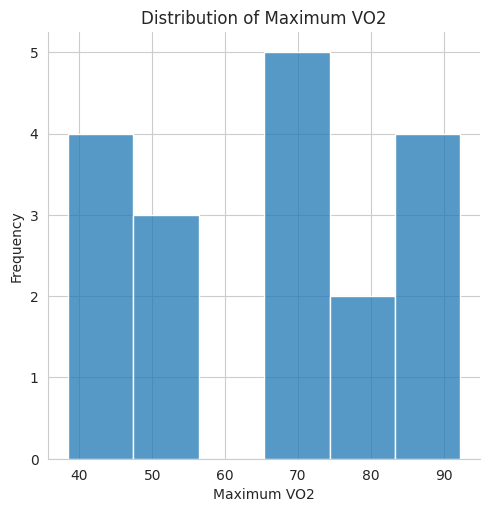

In [38]:

sum_VO2=merged_sports.groupby('ID')['VO2'].sum()
#print(sum_VO2)

sum_VO2_max=pd.merge(sum_VO2,Athletes,on='ID',how='inner')[['ID','VO2','Weight']]
sum_VO2_max['VO2_max']=round(sum_VO2_max['VO2']/sum_VO2_max['Weight'],2)

print(sum_VO2_max.sort_values(by='VO2_max'))


sns.displot(sum_VO2_max['VO2_max'])
sns.set_style('whitegrid')
plt.title('Distribution of Maximum VO2')
plt.xlabel('Maximum VO2')
plt.ylabel('Athelete count')
plt.show()

In [ ]:

n, bins, bar = plt.hist(sum_VO2_max['VO2_max'], bins= range(1,20), align= 'left', rwidth= 0.7, color = 'teal',
                            edgecolor = 'red')

plt.xlabel('Athletes')

plt.ylabel('Maximum VO2')

plt.title('Distribution of Maximum VO2', fontweight = 'bold')

#plt.xticks(range(1,5), fontweight = 'bold', fontsize =14)

plt.grid(axis = 'x')
plt.grid(axis = 'y')

plt.bar_label(bar, labels = None,label_type = 'edge',fontweight = 'bold',fontsize =14)

plt.tight_layout()

plt.show()
